Kyrie Irving, the star player for the Mavericks, is making 52% of his three-point shots this season. If he attempts 10 three-pointers in a game, what is the probability distribution of the number of successful shots he makes?

Number of Successful 3-Pointers | Probability
--------------------------------|------------
              0                | 0.0006
              1                | 0.0070
              2                | 0.0343
              3                | 0.0991
              4                | 0.1878
              5                | 0.2441
              6                | 0.2204
              7                | 0.1364
              8                | 0.0554
              9                | 0.0133
              10               | 0.0014


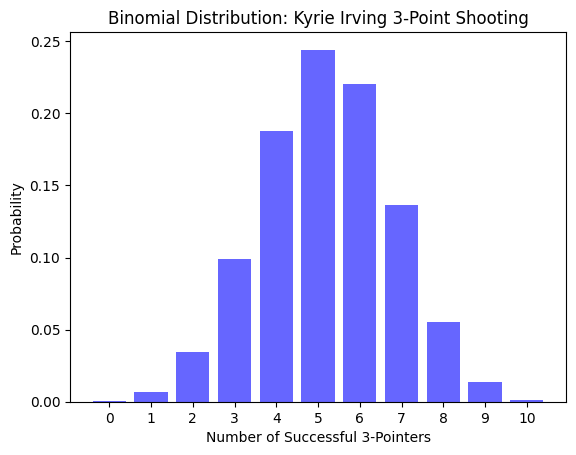

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math


n = 10  
p = 0.52  # Probability of success 

# Function to calculate combinations (n choose k)
def combination(n, k):
    return math.factorial(n) / (math.factorial(k) * math.factorial(n - k))

#  calculating binomial probability for a specific k
def binomial_probability(n, k, p):
    comb = combination(n, k)
    return comb * (p ** k) * ((1 - p) ** (n - k))

# Generating possible values of k (0 to 10 successful shots)
k_values = np.arange(0, n + 1)

# Calculating Binomial probabilities using the binomial_probability function we defined 
binomial_probs = [binomial_probability(n, k, p) for k in k_values]

# Print probabilities in a table format 
print("Number of Successful 3-Pointers | Probability")
print("--------------------------------|------------")
for k, prob in zip(k_values, binomial_probs):
    print(f"{k:^30} | {prob:.4f}")

# Plotting  probability distribution 
plt.bar(k_values, binomial_probs, color='blue', alpha=0.6)
plt.xlabel('Number of Successful 3-Pointers')
plt.ylabel('Probability')
plt.title('Binomial Distribution: Kyrie Irving 3-Point Shooting')
plt.xticks(k_values)
plt.show()


Q1:How does the distribution you were allocated vary from the other three you were not allocated:

1.binomial distribution is discrete(counts success in fixed trials) but normal distribution is continuous, measures things like height , weight

2.poisson distribution is counts over time or space for example number of made shots per quarter while binomial deals with a fixed number of trials like 10 shots in our question

3.exponential models the time until an event happens for example how long before kyrie makes his first 3 pointer in a game ,while binomial tracks how many success happens in set number of attempts


Q2:Would the question you chose be used in the context of a different distribution?

 No, the question we chose, How many 3-pointers does Kyrie make in 10 attempts?, is specific to Binomial and would not be used in other distributions in its current form.
The question involves a fixed number of trials (10 attempts) and is looking at successes (made shots) and failures (missed shots). This fits the Binomial Distribution perfectly.


Part 2: Bayesian Theorem 


Scenario Explanation:


You’re a doctor, and you’re using a test to determine whether a patient has a rare disease called Disease X. The test has some level of accuracy, but it’s not perfect. Here's the situation:

Prior Probability: Before doing the test, you know that 1% of people in the population have Disease X. This is a known fact, so 1% is the prior probability that any random person you test has the disease.

Test Accuracy (Likelihood):

If a person has the disease, the test is 90% accurate. That means, if they have the disease, the test will correctly say they’re positive 90% of the time.
However, the test is not perfect. If a person doesn’t have the disease, there’s still a 5% chance that they will test positive (this is the false positive rate).
What we Want to Know: If the patient tests positive, what’s the probability that they actually have the disease?

In [1]:
# Given probabilities
P_disease = 0.01  # P(Disease X)
P_no_disease = 1 - P_disease  # P(No Disease X)
P_pos_given_disease = 0.90  # P(Pos | Disease X)
P_pos_given_no_disease = 0.05  # P(Pos | No Disease X)

# Step 1: Calculate P(Pos) using the law of total probability
P_pos = (P_pos_given_disease * P_disease) + (P_pos_given_no_disease * P_no_disease)

# Step 2: Apply Bayes' Theorem to calculate P(Disease X | Pos)
P_disease_given_pos = (P_pos_given_disease * P_disease) / P_pos

# Showing  the results
print(f"Prior Probability (P(Disease X)): {P_disease:.4f}")
print(f"Likelihood (P(Pos | Disease X)): {P_pos_given_disease:.4f}")
print(f"Evidence (P(Pos)): {P_pos:.4f}")
print(f"Posterior Probability (P(Disease X | Pos)): {P_disease_given_pos:.4f}")


Prior Probability (P(Disease X)): 0.0100
Likelihood (P(Pos | Disease X)): 0.9000
Evidence (P(Pos)): 0.0585
Posterior Probability (P(Disease X | Pos)): 0.1538


Practical Significance of Bayesian Inference 

1. Bayesian Inference helps us to not consinder only our beliefs when new data (such as a test result becomes available) thus makes us to put in account the evidences 

2. In this case, even though the test is 90% accurate, the low prior probability (1% of the population has the disease) means that the chance the person actually has the disease after a positive test result is still only about 15.38%.

3. This is important because it tells the doctor that even a positive test result does not necessarily mean the person has the disease. Further testing might be necessary.

#### Part 3: Gradient Descent in Code 
#### Using the participation assignment "a simple mode" as reference

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3])
y = np.array([3, 6])

# Initialize parameters
m = -1  
b = 1   
alpha = 0.1  
max_iters = 1000  
tolerance = 1e-6  

# Store m and b values for visualization
m_values = []
b_values = []

# Gradient Descent Loop
for _ in range(max_iters):
    # Compute predictions
    y_pred = m * x + b
    
    # Compute gradients
    dm = -2 / len(x) * np.sum(x * (y - y_pred))
    db = -2 / len(x) * np.sum(y - y_pred)

    # Store old values before update for checking convergence
    m_old, b_old = m, b

    # Update parameters
    m -= alpha * dm
    b -= alpha * db

    # Store new values
    m_values.append(m)
    b_values.append(b)

    # Check convergence condition
    if abs(m - m_old) < tolerance and abs(b - b_old) < tolerance:
        print(f"Converged after {_+1} iterations")
        break

# Final values of m and b
print(f"Final m: {m}, Final b: {b}")

# Visualize the updates
plt.figure(figsize=(10,5))
plt.plot(m_values, label="m values")
plt.plot(b_values, label="b values")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()

# Compute final predictions
y_final = m * x + b
print(f"Final predictions: {y_final}")

## Explanation of the Code

### Data Initialization
- **x = [1,3]**, **y = [3,6]** are the given data points.
- **m = -1**, **b = 1** (initial values from the manual calculations).
- **Learning rate (α) = 0.1**.
- **max_iters = 1000** ensures we don't run indefinitely.
- **tolerance = 1e-6** is the stopping criterion for small changes in **m** and **b**.

### Gradient Descent Loop

1. **Predictions are computed:**  
   𝑦 pred = 𝑚 𝑥 + 𝑏 
2. **Gradients are calculated:**

   ∂ 𝐽 ∂ 𝑚 = − 2 𝑛 ∑ 𝑥 𝑖 ( 𝑦 𝑖 − 𝑦 ^ 𝑖 ) ∂ 𝑚 ∂ 𝐽 ​= − 𝑛 2​ ∑ x 𝑖​ ( 𝑦 𝑖 − 𝑦 ^ 𝑖 ) ∂ 𝐽 ∂ 𝑏 = − 2 𝑛 ∑ ( 𝑦 𝑖 − 𝑦 ^ 𝑖 ) ∂b ∂J ​= − n 2 ​∑ ( 𝑦 𝑖 − 𝑦 ^ 𝑖 )

3. **Updating Parameters**  
   - The new values of **m** and **b** are computed using gradient descent.
   - If the changes in **m** and **b** are below the tolerance, the loop stops.

### Visualization
- **Matplotlib** plots how **m** and **b** change over iterations.

### Final Predictions
- The final values of **m** and **b** are used to compute predictions.

### Key Insights
- The **stopping condition** ensures that we don't run unnecessary iterations.
- The **learning rate** affects how fast we converge; a too-large value might cause divergence.
- **Gradient descent** optimizes **m** and **b** towards reducing error, as seen in the convergence graph.

insights we gained:

Christophe Gakwaya: Through this assignment, I had a clearer grasp of the application of probability distributions to real-life problems, in this case, the Binomial Distribution. I learned it addresses problems with two outcomes: success or failure. What caught my interest is the way it models doing something repeatedly, like coin flipping or shooting, and calculate the likelihood of obtaining a certain number of successes. This helped me to see how the Binomial Distribution is unique compared to other distributions, like the Normal or Poisson distributions. Overall, this exercise helped me to appreciate more how math is used to understand uncertainty and predict outcomes in everyday events.

Lievin Murayire: One key takeaway I learned from this project is the concept of a gradual probability gradient—how outcomes in a probability distribution don’t just appear as isolated points but transition smoothly across a range. Using Kyrie Irving’s three-point shooting as an example, I saw how the likelihood of making 5 shots isn’t drastically different from making 6, but there’s a noticeable decline when you compare it to making 9 or 10. This gradual shift in probabilities helped me understand that probability isn’t just about predicting a single number it’s about recognizing the range of possible outcomes and how they change step by step.